In [62]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 


In [63]:
#only pick the 9th column
df = pd.read_csv('test.csv', usecols=[9])

In [64]:
# drop NaN values
df = df.dropna()


In [65]:
df

,4647
0,4666.0
1,4675.0
2,4675.0
3,4703.0
4,4759.0
...,...
7320,40059.0
7321,40648.0
7322,41080.0
7323,41678.0


<AxesSubplot: >

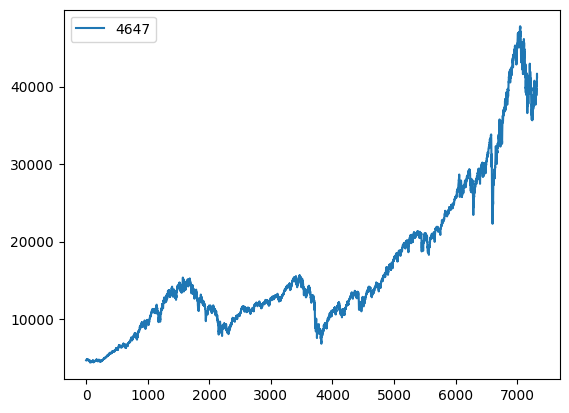

In [66]:
df.plot()

In [67]:
df.head()

,4647
0,4666.0
1,4675.0
2,4675.0
3,4703.0
4,4759.0


In [68]:
#type of data
y = df.values.astype(float)

In [69]:
y

array([[ 4666.],
       [ 4675.],
       [ 4675.],
       ...,
       [41080.],
       [41678.],
       [41235.]])

In [70]:
train_size = int(len(df)*0.93) # 93% of data for training, 7% for testing

In [71]:
train_data = y[:train_size] # all data except the train_size
val_data = y[train_size:] # the last 7% of the data

In [72]:
train_data

array([[ 4666.],
       [ 4675.],
       [ 4675.],
       ...,
       [37865.],
       [38389.],
       [38424.]])

In [126]:
# define the block size, 
block_size = 140 # 100 days of data to predict the next day
batch_size = 2 # number of samples in a batch for training the model
train_data[:block_size]

array([[4666.],
       [4675.],
       [4675.],
       [4703.],
       [4759.],
       [4750.],
       [4734.],
       [4722.],
       [4741.],
       [4741.],
       [4747.],
       [4734.],
       [4747.],
       [4738.],
       [4719.],
       [4719.],
       [4731.],
       [4775.],
       [4788.],
       [4822.],
       [4797.],
       [4828.],
       [4806.],
       [4697.],
       [4719.],
       [4722.],
       [4741.],
       [4700.],
       [4716.],
       [4722.],
       [4747.],
       [4744.],
       [4716.],
       [4688.],
       [4734.],
       [4722.],
       [4659.],
       [4681.],
       [4681.],
       [4663.],
       [4669.],
       [4656.],
       [4669.],
       [4694.],
       [4675.],
       [4697.],
       [4659.],
       [4684.],
       [4691.],
       [4688.],
       [4725.],
       [4725.],
       [4697.],
       [4684.],
       [4697.],
       [4694.],
       [4638.],
       [4594.],
       [4600.],
       [4509.],
       [4447.],
       [4459.],
       [

In [127]:
from sklearn.preprocessing import MinMaxScaler
# define the scaler and fit it to the training data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_data.reshape(-1, 1))


MinMaxScaler(feature_range=(-1, 1))

In [128]:

def get_batch(split):
    # Select the appropriate dataset based on the split
    data = train_data if split == 'train' else val_data
    
    # Generate a random index for each batch
    ix = np.random.randint(0, len(data) - block_size, batch_size)
    
    # Extract the blocks of data for each batch
    x = [data[i:i+block_size] for i in ix]
    y = [data[i+1:i+block_size+1] for i in ix]
    
    # Normalize each block of x and y using the scaler fitted to the training data
    x_norm = [scaler.transform(block.reshape(-1, 1)).reshape(-1) for block in x]
    y_norm = [scaler.transform(block.reshape(-1, 1)).reshape(-1) for block in y]

    # Convert x and y to tensors
    x = torch.tensor(x_norm, dtype=torch.float32)
    y = torch.tensor(y_norm, dtype=torch.float32)
    
    return x, y

   
# get a batch of training data
x, y = get_batch('train')




In [129]:
print('inputs')
print(x.shape)
print(x)
print('targets')
print(y.shape)
print(y)


inputs
torch.Size([2, 140])
tensor([[-9.8090e-01, -9.8055e-01, -9.7908e-01, -9.7926e-01, -9.8090e-01,
         -9.8255e-01, -9.7984e-01, -9.8055e-01, -9.8425e-01, -9.8296e-01,
         -9.8296e-01, -9.8402e-01, -9.8366e-01, -9.8443e-01, -9.8366e-01,
         -9.8219e-01, -9.8331e-01, -9.8202e-01, -9.8425e-01, -9.8278e-01,
         -9.8237e-01, -9.8255e-01, -9.8037e-01, -9.8037e-01, -9.8202e-01,
         -9.8278e-01, -9.8202e-01, -9.8219e-01, -9.8548e-01, -9.8807e-01,
         -9.8772e-01, -9.9307e-01, -9.9671e-01, -9.9600e-01, -1.0000e+00,
         -9.9471e-01, -9.9471e-01, -9.9342e-01, -9.9542e-01, -9.9430e-01,
         -9.9471e-01, -9.9606e-01, -9.9600e-01, -9.9600e-01, -9.9771e-01,
         -9.9736e-01, -9.9765e-01, -9.9412e-01, -9.9442e-01, -9.9166e-01,
         -9.9195e-01, -9.9389e-01, -9.9307e-01, -9.9136e-01, -9.9166e-01,
         -9.9213e-01, -9.9248e-01, -9.9506e-01, -9.9736e-01, -9.9536e-01,
         -9.9771e-01, -9.9642e-01, -9.9642e-01, -9.9636e-01, -9.9248e-01,
         -